0       8.396202
1       2.020950
2      10.751619
3       6.985679
4       8.590890
         ...    
982     5.662324
983     2.481108
984     7.098074
985     8.612791
986     5.020737
Name: absolute_magnitude, Length: 987, dtype: float64


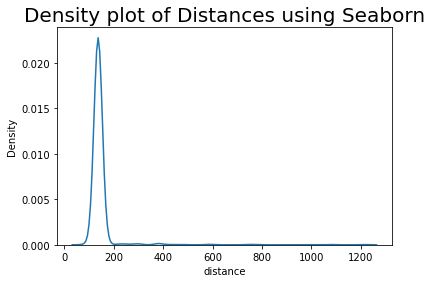

Mean distance to cluster : 143.88833098830273


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy import constants as const
df=pd.read_csv("https://raw.githubusercontent.com/astroclubiitk/computational-astrophysics/main/Final-Project/Pleiades_Cluster.csv")
df["distance"]=1000/df["plx"]
df["absolute_magnitude"]=df["gmag"]-5*(np.log10(df["distance"]))+5
print(df["absolute_magnitude"])
sns.kdeplot(df['distance'])
plt.title("Density plot of Distances using Seaborn",size=20)
plt.show()
mean_distance=df.loc[:,"distance"].mean()
print("Mean distance to cluster :",mean_distance)

In [2]:
df["theoretical_luminosity"]=10**((4.77-df["absolute_magnitude"])/2.5)
print(df["theoretical_luminosity"])

0       0.035442
1      12.578243
2       0.004049
3       0.129936
4       0.029624
         ...    
982     0.439613
983     8.232975
984     0.117158
985     0.029032
986     0.793789
Name: theoretical_luminosity, Length: 987, dtype: float64


In [3]:
df["theoretical_temperature"]=5601/(df["bp_rp"]+0.4)**(2/3)
print(df["theoretical_temperature"])

0      2967.981218
1      7971.951351
2      2422.014607
3      3538.852567
4      2856.065168
          ...     
982    3779.218443
983    6767.605218
984    3631.846532
985    3082.560126
986    4269.318706
Name: theoretical_temperature, Length: 987, dtype: float64


In [4]:
df["theoretical_radius"]=((df["theoretical_luminosity"])**(1/2))/((df["theoretical_temperature"]/5800)**2)
print(df["theoretical_radius"])

0      0.718941
1      1.877313
2      0.364904
3      0.968267
4      0.709810
         ...   
982    1.561662
983    2.107484
984    0.872944
985    0.603218
986    1.644339
Name: theoretical_radius, Length: 987, dtype: float64


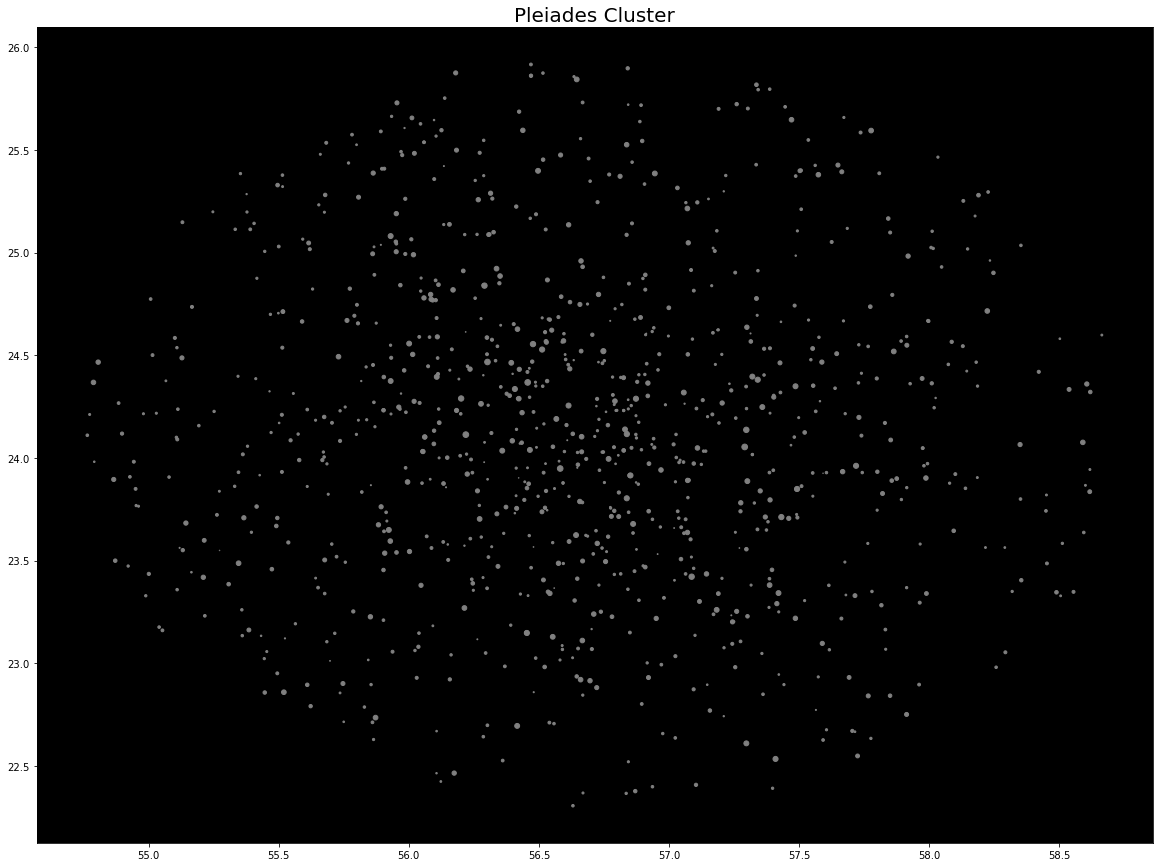

In [63]:
df["brightness"]=df["gmag"].max()-df["gmag"]
plt.figure(figsize=(20,15))
plt.gca().set_facecolor('k')
plt.scatter(df["ra"],df["dec"],s=2*df["brightness"],color='grey')
plt.title("Pleiades Cluster",size=20)
plt.show()

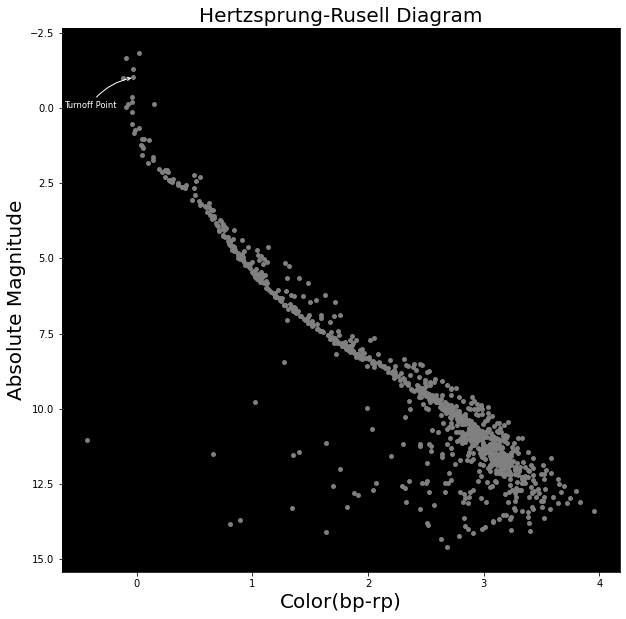

In [59]:
plt.figure(figsize=(10,10))
plt.gca().set_facecolor('k')
plt.scatter(df["bp_rp"],df["absolute_magnitude"],s=15,c='grey')
plt.gca().invert_yaxis()
plt.title("Hertzsprung-Rusell Diagram",size=20)
plt.xlabel("Color(bp-rp)",size=20)
plt.ylabel("Absolute Magnitude",size=20)
plt.annotate("Turnoff Point",xy=(-0.027,-1.02),fontsize="small",color="white",xytext=(-70,-30),textcoords="offset points",arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=-.2",color="white"))
plt.show()

In [25]:
#turn-off point is located in the above hr plot,it is located roughly in between ((df["bp_rp"]<-0.026)&(df["bp_rp"]>-0.031))
print(df.index[(df["bp_rp"]<-0.026)&(df["bp_rp"]>-0.031)].tolist())

[15, 752]


In [60]:
#after locating the turn-off point we can calculate the age of the cluster by the formula: age is inversely proportional to (luminosity)^5/7
age1=(4.5*(10)**9)/((df["theoretical_luminosity"].loc[15])**(5/7))
print(age1,'years')
age2=(4.5*(10)**9)/((df["theoretical_luminosity"].loc[752])**(5/7))
print(age2,'years')

99385748.67821658 years
82463132.16049255 years


In [ ]:
#Therefore the age of the cluster is roughly around 80 to 100 million years.